In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
%run imports_notebook.py

In [3]:
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")

model = GPT2LMHeadModel.from_pretrained("distilgpt2")

In [60]:
x = tokenizer.encode("once upon a time")

for i in range(100):
    token = model.forward(torch.tensor(x[-30:])[None]).logits[0, -1].argsort(dim=-1)[-3].item()
    x.append(token)
    print(tokenizer.decode(x))

once upon a time,
once upon a time, and
once upon a time, and that
once upon a time, and that was
once upon a time, and that was when
once upon a time, and that was when he
once upon a time, and that was when he came
once upon a time, and that was when he came into
once upon a time, and that was when he came into power
once upon a time, and that was when he came into power."
once upon a time, and that was when he came into power." —
once upon a time, and that was when he came into power." —The
once upon a time, and that was when he came into power." —The Great
once upon a time, and that was when he came into power." —The Great White
once upon a time, and that was when he came into power." —The Great White King
once upon a time, and that was when he came into power." —The Great White King

once upon a time, and that was when he came into power." —The Great White King
"
once upon a time, and that was when he came into power." —The Great White King
"And
once upon a time, and that was when

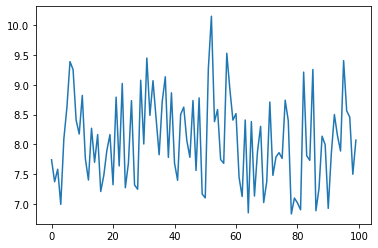

In [164]:
plt.plot(torch.randn(100, 64).norm(dim=-1).numpy())

In [161]:
x = tokenizer.encode("in a galaxy far, far away star wars happened", return_tensors="pt")
print(x.shape[-1])

# x = torch.cat([torch.tensor(tokenizer.unk_token_id)[None, None], x], dim=-1)
# outputs = model.forward(x, torch.randn(6, 2, 1, 12, 20, 64), output_attentions=True)
outputs = model.forward(x, output_attentions=True)
# (batch, head, seq_length, head_features)

10


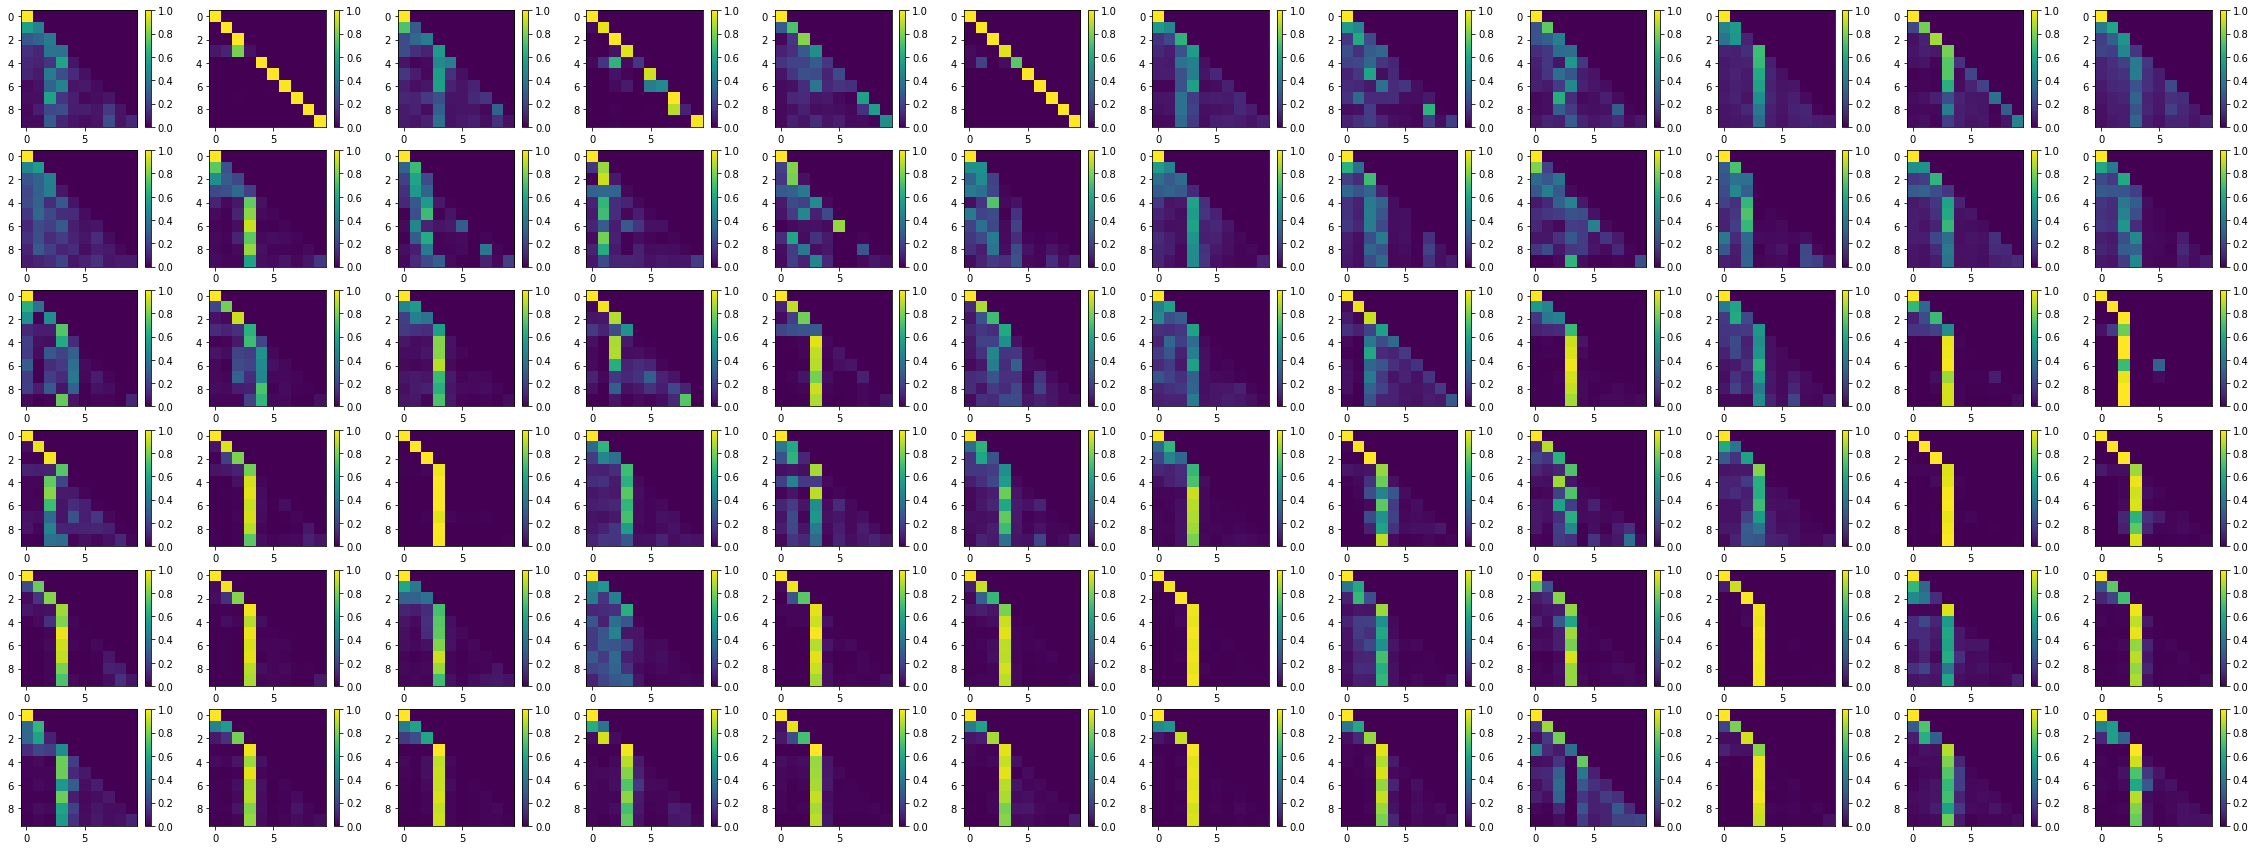

In [160]:
n_layers = model.config.n_layer
n_heads = model.config.n_head
plt.figure(figsize=(40, 15))
for i_layer, layer in enumerate(outputs.attentions):
    for i_head, head in enumerate(layer[0]):
        plt.subplot(n_layers, n_heads, i_layer*n_heads+i_head+1)
        plt.imshow(to_np(head), vmin=0, vmax=1)
        plt.colorbar()
plt.show()

In [ ]:
class HopfieldMemory():
    pass

In [ ]:
Hopfield

In [2]:
with open('book.txt') as f:
    data = f.read()

In [3]:
len(data)

79959

In [26]:
from transformers import GPT2Model, AutoTokenizer, AutoModelForCausalLM
from memory_gpt2 import *

In [27]:
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")

model = AutoModelForCausalLM.from_pretrained("distilgpt2")

In [28]:
type(model)

transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel

In [8]:
all_tokens = tokenizer.encode(data, return_tensors='pt')

Token indices sequence length is longer than the specified maximum sequence length for this model (22205 > 1024). Running this sequence through the model will result in indexing errors


In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
model = model.to(device)

In [14]:
def calc_perplexity(model, all_tokens, context_length=100):
    
    losses = []
    # for i in tqdm(range(context_length, all_tokens.shape[-1])):
    for i in tqdm(range(context_length, context_length+100)):
        x = all_tokens[:, max(i-context_length, 0):i]
        x = x.to(device)
        yp = model(input_ids=x, labels=x)
        losses.append(yp.loss.item())
    return losses
    
    
losses = calc_perplexity(model, all_tokens, context_length=100)
    


  0%|          | 0/100 [00:00<?, ?it/s]

In [15]:
import matplotlib.pyplot as plt

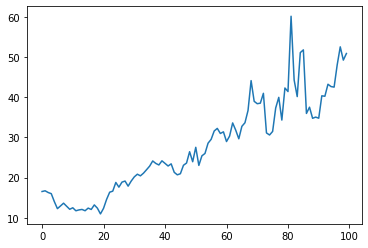

In [18]:
plt.plot(np.e**np.array(losses))

In [19]:
model.config.n_positions

1024

In [1]:
# model.forward(input_ids=all_tokens[:, :100], labels=all_tokens[:, :100])

In [ ]:
model.forward()

In [53]:
all_tokens.shape

torch.Size([1, 22205])

In [17]:
a = model.transformer.h[0].attn
a

GPT2Attention(
  (c_attn): Conv1D()
  (c_proj): Conv1D()
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)

In [23]:
[p.shape for p in a.parameters()]

[torch.Size([768, 2304]),
 torch.Size([2304]),
 torch.Size([768, 768]),
 torch.Size([768])]